# Importando as dependencias que sao usadas na Regressão Linear de Mínimos Quadrados

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Implementação da Regressão Linear Múltipla (quando existe mais de uma variável que se quer relacionar com uma única saída)
#### Aqui, implementamos do zero um regressor linear utilizando o método dos Mínimos Quadrados - MQO
    - O MQO é obtido com o uso do método da pseudo-inversa

In [14]:
class MultpleLinearRegression:
    def __init__(self, X, y):
        self.X = X
        self.y = y.reshape(-1, 1)
        
        self.final_predict = None
        
    def least_squares(self, least_squares_type='MQO'):
        return np.linalg.pinv(self.X) @ self.y # coeficientes da equação de regressao - usando o metodo da pseudo-inversa
    
    def fit(self):
        least_squares = self.least_squares()
        
        # O modelo de regressão ajustado (preditor)
        y_pred = self.X @ least_squares # Formula => Y = β0 + β1*X1 + β2*X2 + ... + βn*Xn
        
        # Coeficiente de determinação (R²)
        r_squared = self.coefficient_of_determination(y_pred)
        
        compare_results = {
            'Valores Reais': self.y.ravel(),
            'Predições do Modelo': y_pred.ravel()
        }
        df = pd.DataFrame(compare_results)

        print(f'[INFO] \n\n {df}')
        print('---------------------------------------------------------------------------------------------------------------')
        print(f'[INFO] Coeficientes β: {least_squares.T[0]}')
        print('---------------------------------------------------------------------------------------------------------------')
        print(f'[INFO] R²:                            {r_squared:.3f}')
        print(f'[INFO] R :                            {np.sqrt(r_squared):.3f}')
        
        # Plotando o gráfico com os dados reais e as predições do modelo
        self.final_predict = y_pred
        self.plot_results(self.final_predict)

    def coefficient_of_determination(self, y_pred):
        mean_y = np.mean(self.y)
        ss_total = np.sum((self.y - mean_y) ** 2)
        ss_res = np.sum((self.y - y_pred) ** 2)
        r_squared = 1 - (ss_res / ss_total)
        return r_squared

    def plot_results(self, y_pred):
        plt.scatter(self.y, y_pred, label='Dados Originais')
        plt.plot([np.min(self.y), np.max(self.y)], [np.min(y_pred), np.max(y_pred)], color='red', label='Predições')
        plt.title('Regressao Linear Multipla')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()


## Carregamento da base de dados e aplicação da classe de regressão multipla

In [15]:
def load_data(data_path):
    data = pd.read_excel(data_path, engine='openpyxl')
    
    input_data = data.iloc[:, 0::].T
    
    # print(f'[INFO] Processed input data \n\n {input_data}') - printando os dados orig
    
    X = input_data
    
    input_data_matrix = np.array(input_data)
    X = input_data_matrix[1:7] # dimensao n×(k+1)
    
    y = input_data_matrix[-1] # dimensao n×1

    return X.T, y.T

def main():
    # Carregando a base de dados
    data_path = 'dataset/Real estate valuation data set.xlsx'
    
    X, y = load_data(data_path)

    print('------------------------------------ Aplicando a regressao linear multipla ------------------------------------')
    multple_linear_regression = MultpleLinearRegression(X=X, y=y)
    multple_linear_regression.fit()
    print('---------------------------------------------------------------------------------------------------------------')


## Chamando a função principal

------------------------------------ Aplicando a regressao linear multipla ------------------------------------
[INFO] 

      Valores Reais  Predições do Modelo
0             37.9            47.523911
1             42.2            48.100449
2             47.3            47.347537
3             54.8            47.035650
4             43.1            46.236478
..             ...                  ...
409           15.4            14.881102
410           50.0            50.523699
411           40.6            46.553962
412           52.5            45.207329
413           63.9            53.398837

[414 rows x 2 columns]
---------------------------------------------------------------------------------------------------------------
[INFO] Coeficientes β: [ 3.74264240e+00 -2.70811725e-01 -5.49496354e-03  1.12905557e+00
  2.03300942e+02 -1.03400527e+02]
---------------------------------------------------------------------------------------------------------------
[INFO] R²:                  

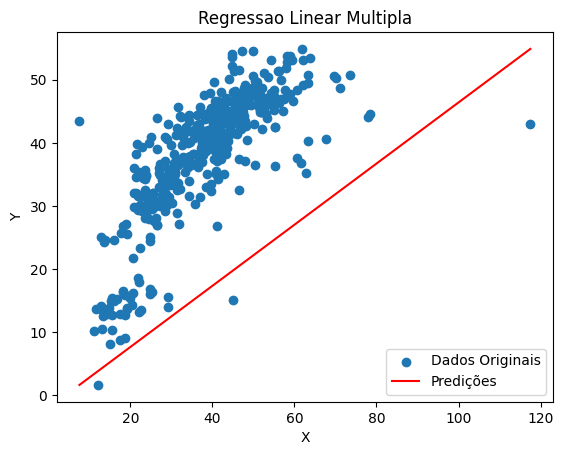

---------------------------------------------------------------------------------------------------------------


In [16]:
main()